## Import the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the data 

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Exploratory Data Analysis 

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_df_copy = df.copy()

#### Replacing all the 0's with NaN as all the missing values in the dataset have been replaced with 0

In [10]:
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
diabetes_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Data Visualization

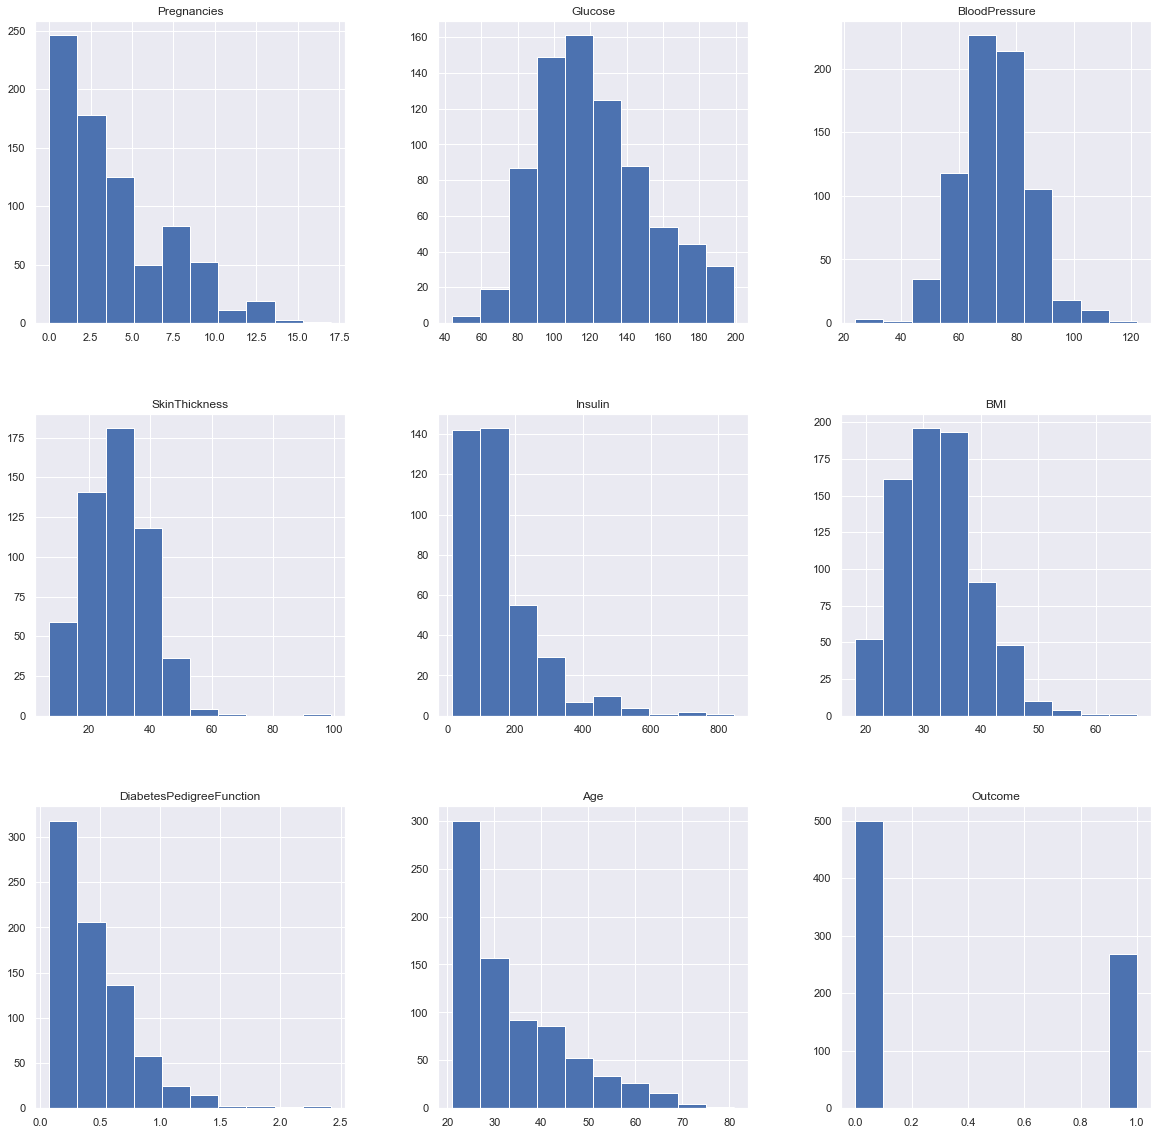

In [12]:
p = diabetes_df_copy.hist(figsize=(20,20))

#### Now, we will replace the NaN value's with the mean of the respective column

In [13]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].median(),inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].median(),inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(),inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(),inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(),inplace=True)

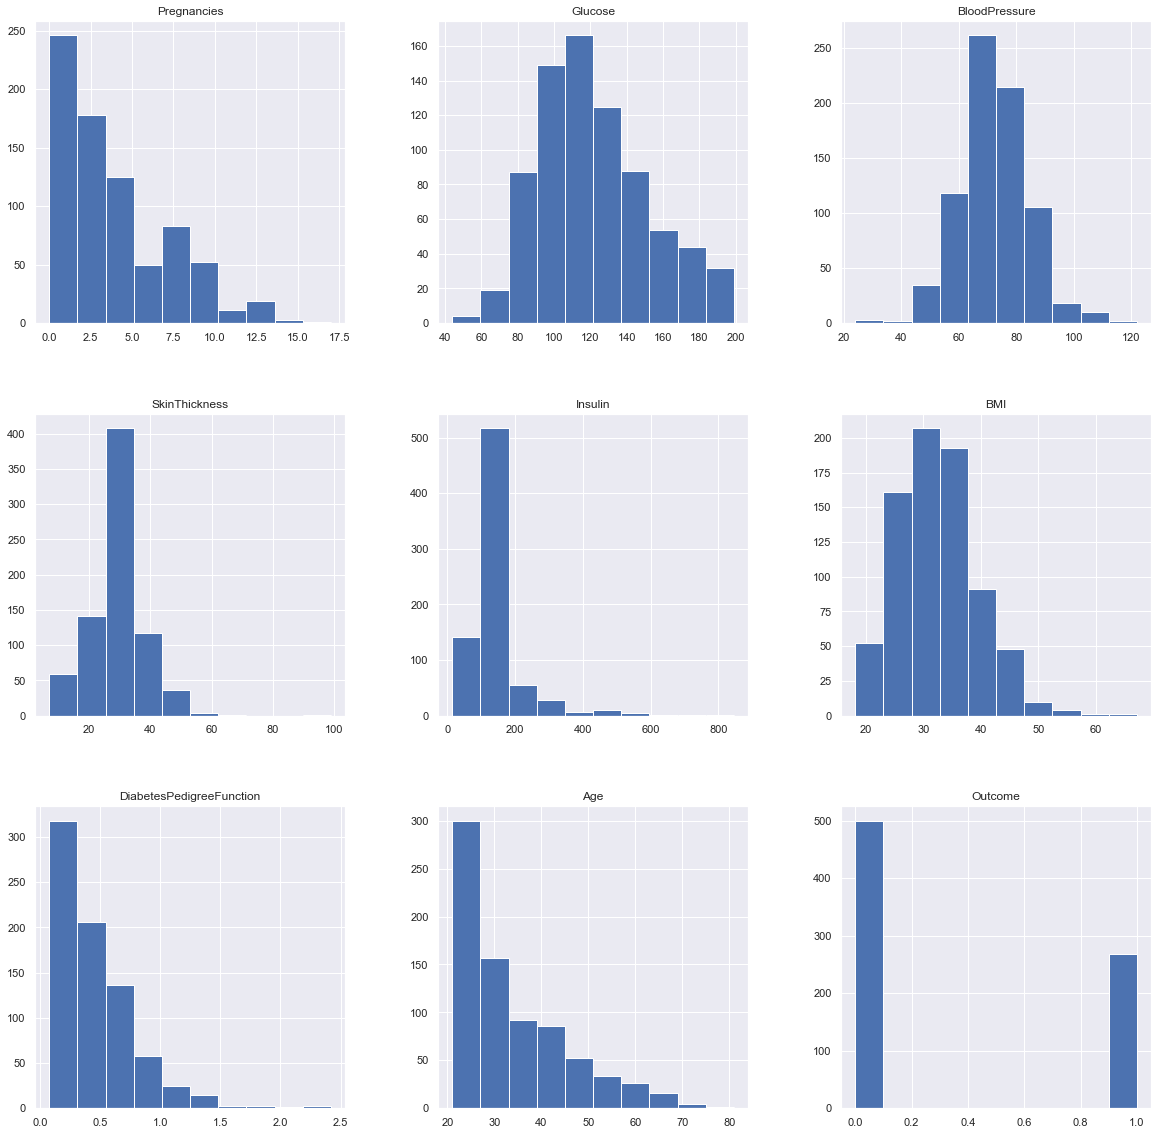

In [14]:
p = diabetes_df_copy.hist(figsize=(20,20))

#### Plotting Null count Analysis

<AxesSubplot:>

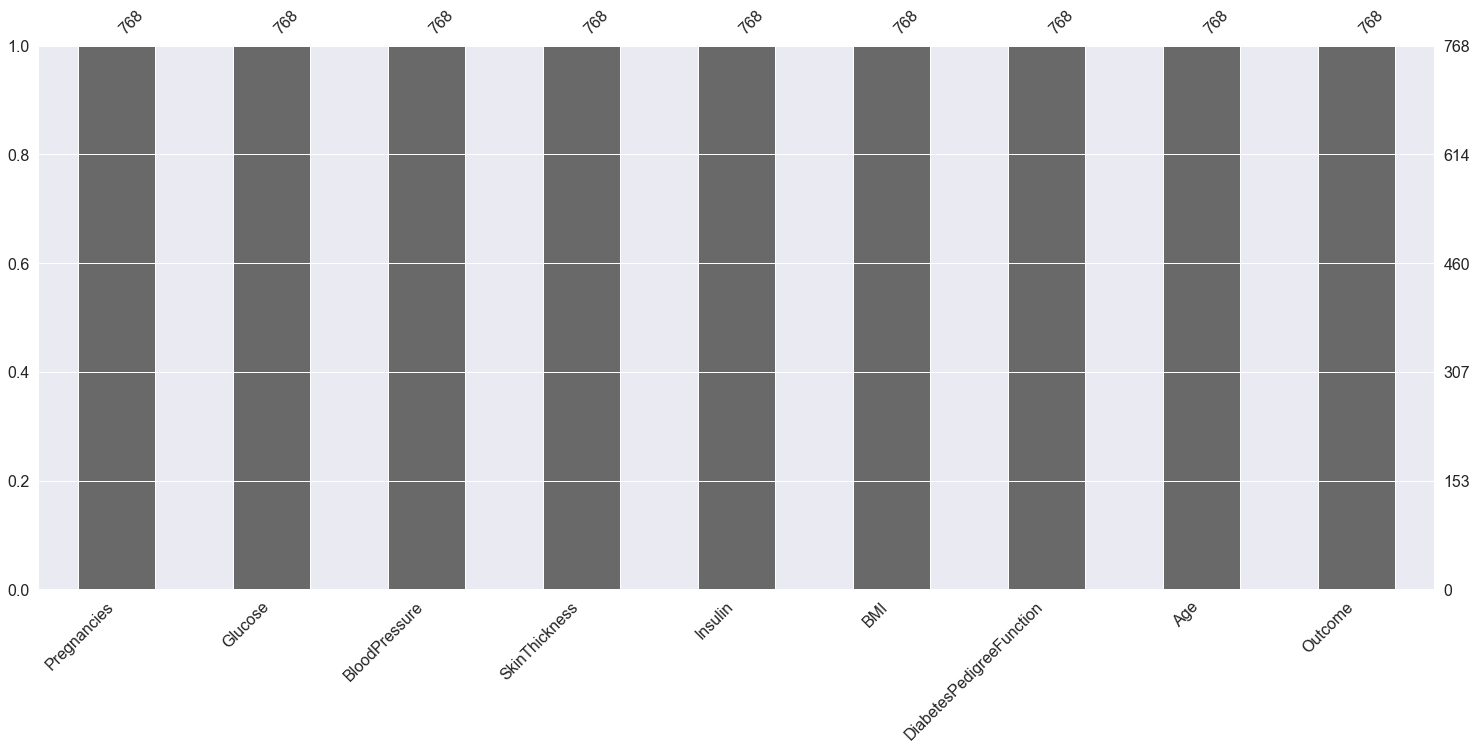

In [15]:
msno.bar(diabetes_df_copy)

<AxesSubplot:>

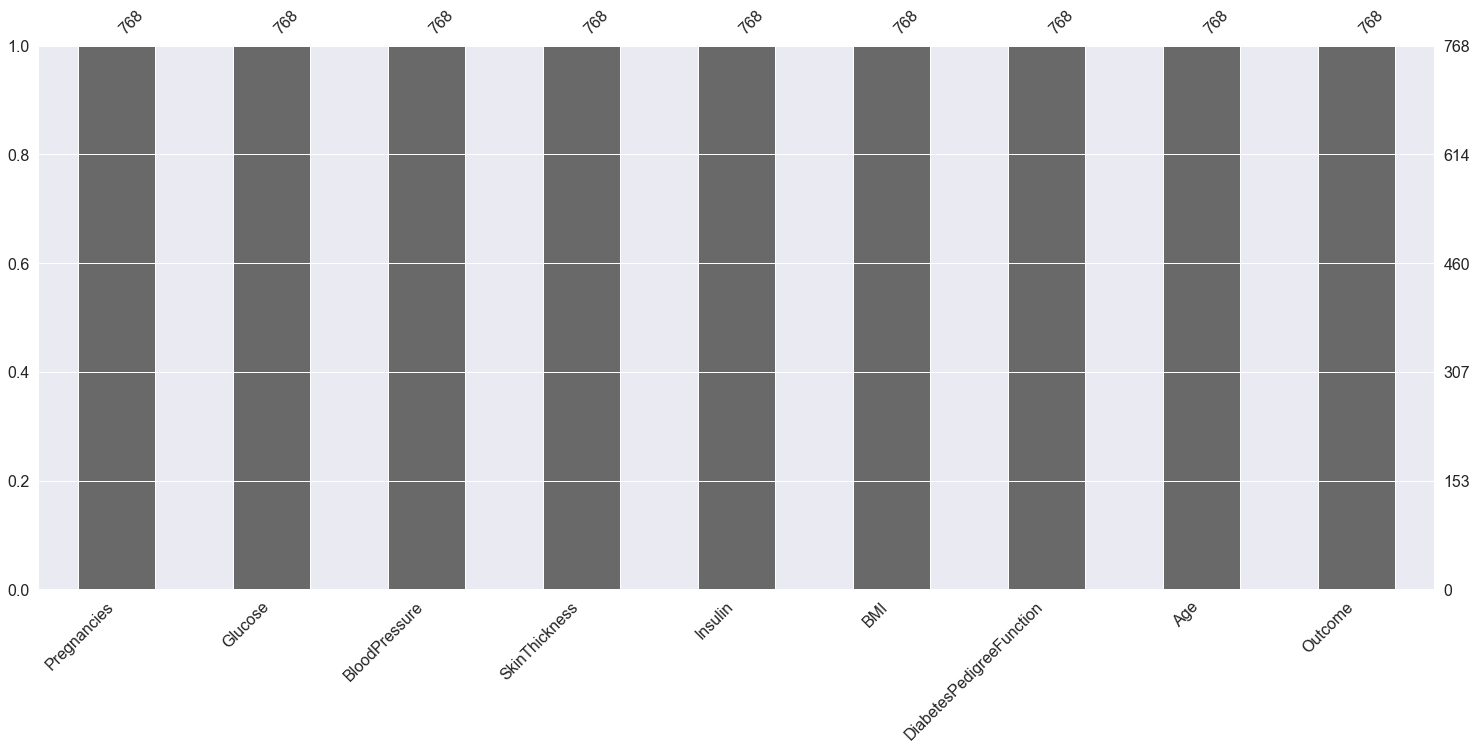

In [16]:
msno.bar(df)

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
diabetes_df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

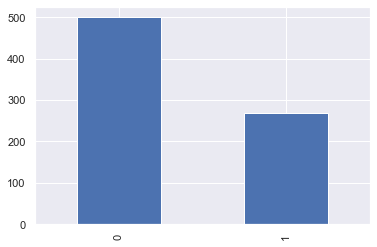

In [19]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df_copy["Outcome"].map(lambda x: color_wheel.get(x+1))


diabetes_df_copy['Outcome'].value_counts().plot(kind="bar")

In [20]:
diabetes_df_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

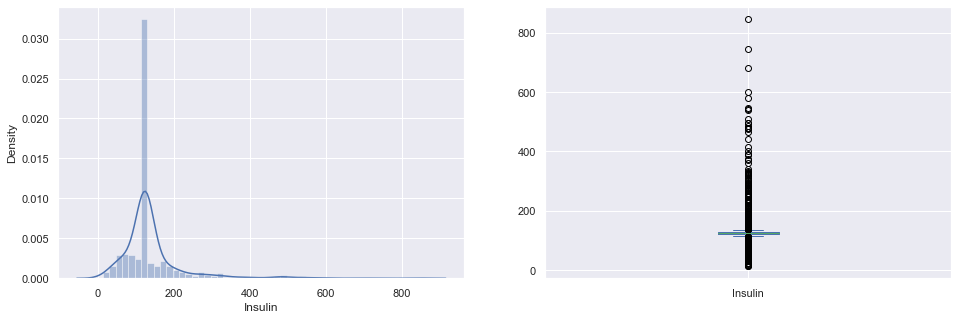

In [21]:
plt.subplot(121), sns.distplot(diabetes_df_copy['Insulin'])
plt.subplot(122), diabetes_df_copy['Insulin'].plot.box(figsize=(16,5))
plt.show()

## Checking for correlation between all the features

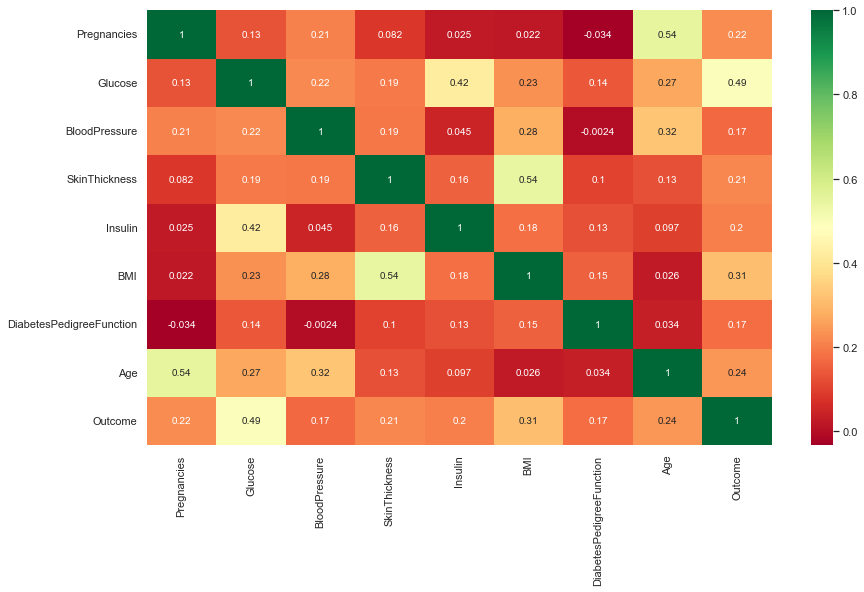

In [22]:
plt.figure(figsize=(14,8))

p = sns.heatmap(diabetes_df_copy.corr(),annot=True, cmap='RdYlGn')

## Scaling the data

In [23]:
scaler = StandardScaler()

In [24]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
diabetes_df_copy.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [26]:
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [27]:
type(diabetes_df_copy['Pregnancies'][0])

numpy.int64

In [28]:
Scaled_inputs =  pd.DataFrame(scaler.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1)), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
Scaled_inputs.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [29]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Selecting the target column

In [31]:
diabetes_df_copy['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Selecting the Target and Features 

In [32]:
y = diabetes_df_copy['Outcome']
X = diabetes_df_copy.drop(['Outcome'],axis=1)

### Splitting the data into train and test split

In [33]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=7)

## Model Building

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rfc_train_pred = rfc.predict(X_train)

print(f'Accuracy Score = {metrics.accuracy_score(y_train,rfc_train_pred)}')

Accuracy Score = 1.0


#### Thus, we can clearly see that our training data is overfitted. So, let's check the accuracy for Test data

In [36]:
predictions = rfc.predict(X_test)

Random_forest = round(metrics.accuracy_score(y_test,predictions)*100,2)
print(Random_forest)

77.17


#### Confusion Matrix

In [37]:
print(metrics.confusion_matrix(y_test,predictions))

[[136  26]
 [ 32  60]]


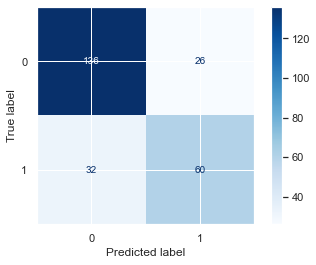

In [38]:
metrics.plot_confusion_matrix(rfc, X_test, y_test, cmap='Blues', values_format='d')

#### Classification report

In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       162
           1       0.70      0.65      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()

In [41]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
d_predictions = d_tree.predict(X_test)

Decision_Tree = round(metrics.accuracy_score(y_test,d_predictions)*100,2)
print(Decision_Tree)

70.08


In [43]:
print(metrics.confusion_matrix(y_test,d_predictions))

[[118  44]
 [ 32  60]]


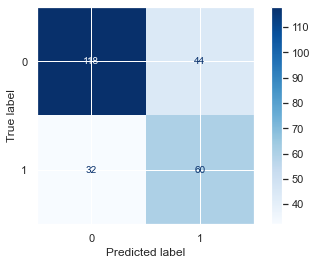

In [44]:
metrics.plot_confusion_matrix(d_tree, X_test, y_test, cmap='Blues', values_format='d')

In [45]:
print(metrics.classification_report(y_test,d_predictions))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       162
           1       0.58      0.65      0.61        92

    accuracy                           0.70       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.71      0.70      0.70       254



### Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [47]:
svc_pred = svc_model.predict(X_test)

Support_Vector_Classifier = round(metrics.accuracy_score(y_test,svc_pred)*100,2)
print(Support_Vector_Classifier)

75.59


In [48]:
print(metrics.confusion_matrix(y_test,svc_pred))

[[147  15]
 [ 47  45]]


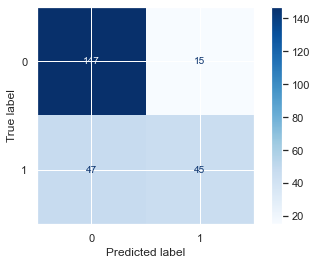

In [49]:
print(metrics.plot_confusion_matrix(svc_model,X_test,y_test,cmap='Blues',values_format='d'))

In [50]:
print(metrics.classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       162
           1       0.75      0.49      0.59        92

    accuracy                           0.76       254
   macro avg       0.75      0.70      0.71       254
weighted avg       0.75      0.76      0.74       254



## Model Evaluation 

In [51]:
best_model = pd.DataFrame({
                            'Models': ['Random Forest','Decision Tree','SVM'],
                            'Accuracy': [Random_forest,Decision_Tree, Support_Vector_Classifier]
})
best_model.sort_values(by=['Accuracy'], ascending=False)

,Models,Accuracy
0,Random Forest,77.17
2,SVM,75.59
1,Decision Tree,70.08


### Therefore, Random forest is the best suitable model for this case with an accuracy of 75.59%

## Feature Importance

In [52]:
rfc.feature_importances_

array([0.07679991, 0.25605102, 0.08437277, 0.07890152, 0.08581731,
       0.15797509, 0.12404257, 0.13603982])

<AxesSubplot:>

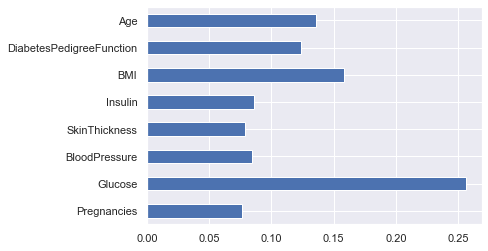

In [53]:
pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')

### Here, we get clear inference that Glucose is most import feature

## Saving the Model - Random Forest 

In [54]:
import pickle 
# Here, we will dump our best model to save the same 
saved_model = pickle.dumps(rfc)
# Now, load the saved model 
rfc_from_pickle = pickle.loads(saved_model)
# lastly, after loading the model, we will make predictions 
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [55]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Let's make some final predictions to check if our model is actually working

In [57]:
# Let's predict the 4th patient, the output will either be 0 or 1 i.e person suffering diabetes or not

rfc.predict([[0,137,40,35,168,43.1,2.288,33]])

array([1], dtype=int64)

In [58]:
# Predictions for 767th patient 

rfc.predict([[1,93,70,31,0,30.4,0.315,23]])

array([0], dtype=int64)